# This exercise will do a fundamental analysis of correlating AUDTHB with gold (AUD), crude oil (OPEC) and stock (Nasdaq) price

# 1. Prepare Data Set

In [2]:
import pandas as pd
import numpy as np
#import scipy as sp
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
# read in the AUDTHB csv file as a df, declaring null values, and initial look at the type of data and data types 
data1 = pd.read_csv('aud_fx_thb.csv', na_values=[' '])
# drop the null values from df
data1= pd.DataFrame(data1).dropna()
# do a df.describe to have a feel of the key stats of each currency pair 
#- counts, high, low, increase, decrease, anomalies
np.round(data1.describe(), 2)

,AUDTHB
count,2790.00
mean,28.86
std,2.33
min,20.98
25%,27.47
50%,29.14
75%,30.45
max,33.38


In [22]:
# read in the Crude Oil data 
data2 = pd.read_csv('opec_orb.csv', na_values=[' '])
# drop the null values from df
data2= pd.DataFrame(data2).dropna()
data2 = data2.rename(columns = {'Value':'Crude_Oil'})
merge_data = pd.merge(data1,data2, on='Date')
# do a df.describe to have a feel of the key stats of each currency pair 
#- counts, high, low, increase, decrease, anomalies
np.round(merge_data.describe(), 2)

,AUDTHB,Crude_Oil
count,2760.00,2760.00
mean,28.86,80.21
std,2.33,26.21
min,20.98,22.48
25%,27.47,58.12
50%,29.14,77.32
75%,30.45,105.57
max,33.38,140.73


In [23]:
# read in the Gold data
data3 = pd.read_csv('gold_au.csv', na_values=[' '])
# drop the null values from df
data3= pd.DataFrame(data3).dropna()
data3 = data3.rename(columns = {'Value':'Gold'})
merge_data = pd.merge(merge_data,data3, on='Date')
# do a df.describe to have a feel of the key stats of each currency pair 
#- counts, high, low, increase, decrease, anomalies
np.round(merge_data.describe(), 2)

,AUDTHB,Crude_Oil,Gold
count,2760.00,2760.00,2760.00
mean,28.86,80.21,1303.67
std,2.33,26.21,299.47
min,20.98,22.48,702.66
25%,27.47,58.12,1046.21
50%,29.14,77.32,1384.36
75%,30.45,105.57,1543.48
max,33.38,140.73,1823.13


In [24]:
# read in the Nasdaq data
data4 = pd.read_csv('nasdaq.csv', na_values=[' '])
# drop the null values from df
data4= pd.DataFrame(data4).dropna()
data4 = data4.rename(columns = {'Close':'Nasdaq'})
merge_data = pd.merge(merge_data,data4, on='Date')
# do a df.describe to have a feel of the key stats of each currency pair 
#- counts, high, low, increase, decrease, anomalies
np.round(merge_data.describe(), 2)

,AUDTHB,Crude_Oil,Gold,Nasdaq
count,2689.00,2689.00,2689.00,2689.00
mean,28.86,80.24,1303.06,3092.05
std,2.33,26.18,299.19,1059.59
min,20.98,22.48,702.66,1268.64
25%,27.49,58.20,1046.39,2314.68
50%,29.14,77.38,1384.00,2695.25
75%,30.46,105.56,1542.40,4070.06
max,33.38,140.73,1823.13,5283.93


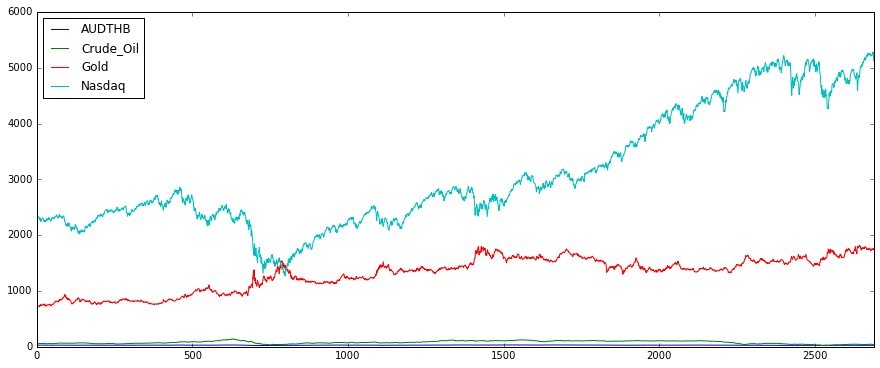

In [25]:
# try a numpy plot to compare the 4 datasets
merge_data.plot()

In [31]:
# normalise the data for better visualisation on y-axis scale
data_adj = merge_data
data_adj['Oil_ADJ'] = data_adj['Crude_Oil'] / 2.7
data_adj['Gold_ADJ'] = data_adj['Gold'] / 45
data_adj['Nasdaq_ADJ'] = data_adj['Nasdaq'] / 107
data_adj = data_adj.drop('Crude_Oil', 1)
data_adj = data_adj.drop('Nasdaq', 1)
data_adj = data_adj.drop('Gold', 1)
print (data_adj.head())

   AUDTHB      Date    Oil_ADJ   Gold_ADJ  Nasdaq_ADJ
0  30.160  3-Jan-06  20.592593  15.983956   20.969533
1  30.195  4-Jan-06  20.881481  15.793124   21.153831
2  30.050  5-Jan-06  20.966667  15.614772   21.279160
3  29.990  6-Jan-06  21.029630  15.834980   21.547852
4  29.955  9-Jan-06  21.218519  15.966667   21.669999


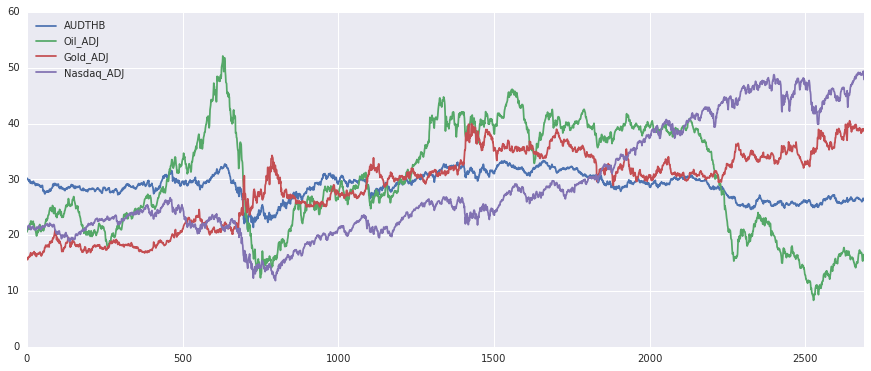

In [33]:
# try the numpy plot again to compare the adjusted time series pairs
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
data_adj.plot()

* Observations:

1. Oil and stock prices looks like running their own trend
2. Since this is adjusted data, the real correlations may not be as strong as what is shown

In [28]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# 2. Run Pearson Test and Build Heatmap

In [29]:
# DataFrames corr() function calculates pairwise correlations using specified 
# algorithm: 'pearson, 'kendall', and 'spearman' are supported. I'm using 'Pearson' here.
# Correlations are returned in a new DataFrame instance (corr_data1 below).
corr_data1 = merge_data.corr(method='pearson')
print("--------------- AUDTHB AND MACRO FACTORS CORRELATION MATRIX ---------------")
print(corr_data1.head(len(data1)))

--------------- CURRENCY PAIRS CORRELATION MATRIX ---------------
             AUDTHB  Crude_Oil      Gold    Nasdaq
AUDTHB     1.000000   0.832489  0.021426 -0.208851
Crude_Oil  0.832489   1.000000  0.137366 -0.151656
Gold       0.021426   0.137366  1.000000  0.553728
Nasdaq    -0.208851  -0.151656  0.553728  1.000000


--------------- CURRENCY PAIRS CORRELATION HEATMAP ---------------


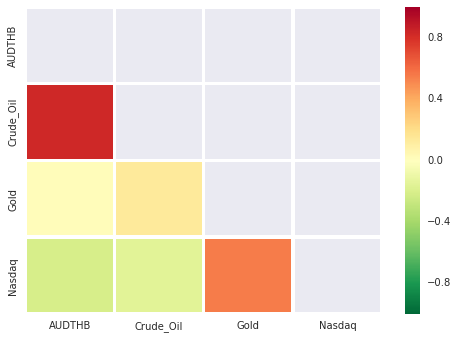

In [30]:
print("--------------- CURRENCY PAIRS CORRELATION HEATMAP ---------------")
# A mask is created to display only the lower triangle of the matrix, as it is mirrored diagonally.
map_mask = np.zeros_like(corr_data1)
map_mask[np.triu_indices_from(map_mask)] = True
# Create the heatmap using seaborn library. 
# Colours chose from: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_data1, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = map_mask, linewidths=2.5)

Story:
1. AUDTHB is strongly influenced by crude oil price... because oil price globally is tagged to USD.. When Oil goes up, USD goes down because US is a major Oil importer. This diverts US investments into Australia, so  AUD goes up, and previous currency pair analysis shows AUDTHB and AUDUSD correlation.
2. AUDTHB not influenced by gold or stock prices...